In [1]:
# Moundt the Google Drive

from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [7]:
# Set the Libraries
from __future__ import print_function
import keras
from keras.preprocessing.image import load_img, ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
import os
import matplotlib.pyplot as plt

In [3]:
# Hyperparameters
num_classes = 5
img_rows,img_cols = 48,48
batch_size = 32

In [4]:
# Path on your google drive
train_data_dir = '/content/gdrive/My Drive/Colab Notebooks/SummerSession/fer2013/train'
validation_data_dir = '/content/gdrive/My Drive/Colab Notebooks/SummerSession/fer2013/validation'

# Quick Data visualization

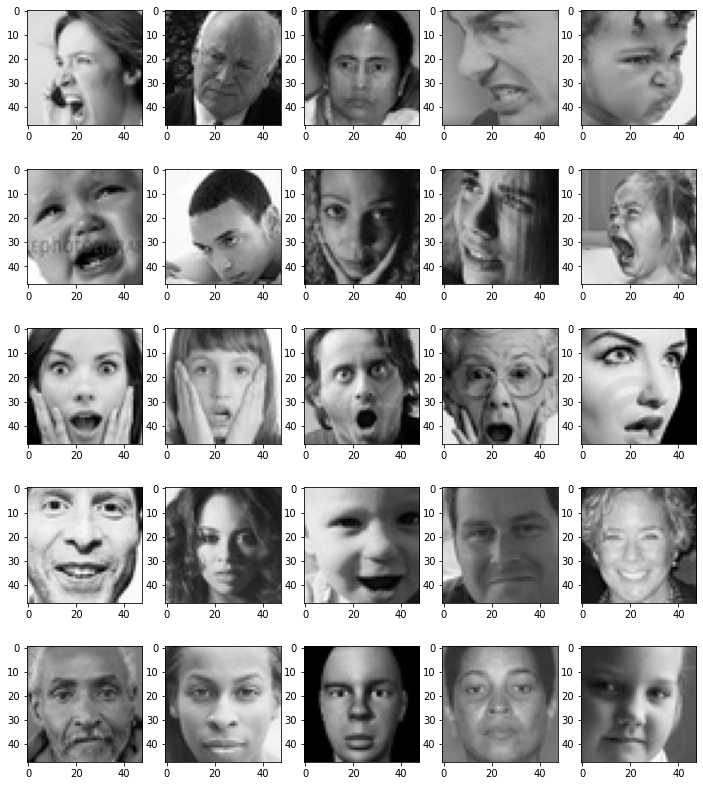

In [13]:
# display some images for every different expression
base_path = '/content/gdrive/My Drive/Colab Notebooks/SummerSession/fer2013/'
pic_size = 48
plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

In [17]:
# count number of train images for each expression

for expression in os.listdir(base_path + "train"):
    print(str(len(os.listdir(base_path + "train/" + expression))) + " " + expression + " images")

4015 Angry images
4830 Sad images
3171 Surprise images
7225 Happy images
4965 Neutral images


# Setup the Data generators

In [18]:
# number of images to feed into the NN for every batch

train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					width_shift_range=0.4,
					height_shift_range=0.4,
					horizontal_flip=True,
					fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(img_rows,img_cols),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(img_rows,img_cols),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)

# Initialising the CNN
model = Sequential()

Found 24206 images belonging to 5 classes.
Found 3006 images belonging to 5 classes.



Deep learning models are trained by being fed with batches of data. Keras has a very useful class to automatically feed data from a directory: ImageDataGenerator.

It can also perform data augmentation while getting the images (randomly rotating the image, zooming, etc.). This method is often used as a way to artificially get more data when the dataset has a small size.

The function flow_from_directory() specifies how the generator should import the images (path, image size, colors, etc.).

**Setup our Convolutional Neural Network (CNN)**

We chose to use a Convolutional Neural Network in order to tackle this face recognition problem. Indeed this type of Neural Network (NN) is good for extracting the features of images and is widely used for image analysis subjects like image classification.

Quick reminder of what a NN is:

![대체 텍스트](https://camo.githubusercontent.com/aabb96213afe04fe56704233a8627f1d0a0c9600/68747470733a2f2f736b796d696e642e61692f696d616765732f77696b692f70657263657074726f6e5f6e6f64652e706e67)

A Neural Network is a learning framework that consists in multiple layers of artificial neurons (nodes). Each node gets weighted input data, passes it into an activation function and outputs the result of the function:



A NN is composed of several layers of nodes:
![대체 텍스트](https://camo.githubusercontent.com/038a41a42a84baf9ec5eff9ec031e75486a40aa9/68747470733a2f2f7777772e7265736561726368676174652e6e65742f70726f66696c652f4d617274696e5f4d7573696f6c2f7075626c69636174696f6e2f3330383431343231322f6669677572652f666967312f41533a34303930343030373832393530343040313437343533343136323132322f412d67656e6572616c2d6d6f64656c2d6f662d612d646565702d6e657572616c2d6e6574776f726b2d49742d636f6e73697374732d6f662d616e2d696e7075742d6c617965722d736f6d652d686572652d74776f2e706e67)


* An input layer that will get the data. The size of the input layer depends on the size of the input data.
* Some hidden layers that will allow the NN to learn complex interactions within the data. A Neural Network with a lot of hidden layers is called a Deep Neural Network.
* An output layer that will give the final result, for instance a class prediction. The size of this layer depends on the type of output we want to produce (e.g. how many classes do we want to predict?)</br>

Classic NNs are usually composed of several fully connected layers. This means that every neuron of one layer is connected to every neurons of the next layer.


Convolutional Neural Networks also have Convolutional layers that apply sliding functions to group of pixels that are next to each other. Therefore those structures have a better understanding of patterns that we can observe in images. We will explain this in more details after.


Now let's define the architecture of our CNN:

In [ ]:
# 1st Convolution Layer
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# 2nd Convolution layer
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# 3rd Convolution layer
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# 4th Convolution layer
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Fully connected layer 2nd layer
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)       


We define our CNN with the following global architecture:

* 4 convolutional layers
* 2 fully connected layers

The convolutional layers will extract relevant features from the images and the fully connected layers will focus on using these features to classify well our images. This architecture was inspired by the following work on the subject: https://github.com/jrishabh96/Facial-Expression-Recognition

Let's focus on how our convolution layers work. Each of them contain the following operations:

* A convolution operator: extracts features from the input image using sliding matrices to preserve the spatial relations between the pixels. The following image summarizes how it works:

![대체 텍스트](https://camo.githubusercontent.com/623926ff4fcc45ab7c1c2f3d2dad14bfe3ffb244/687474703a2f2f646565706c6561726e696e672e7374616e666f72642e6564752f77696b692f696d616765732f362f36632f436f6e766f6c7574696f6e5f736368656d617469632e676966)

The green matrix corresponds to the raw image values. The orange sliding matrix is called a 'filter' or 'kernel'. This filter slides over the image by one pixel at each step (stride). During each step, we multiply the filter with the corresponding elements of the base matrix. There are different types of filters and each one will be able to retrieve different image features:

![대체 텍스트](https://camo.githubusercontent.com/5d86a0dc6f1e2cf7bbeb1ab04ac14b6590033ef8/68747470733a2f2f756a776c6b61726e2e66696c65732e776f726470726573732e636f6d2f323031362f30382f73637265656e2d73686f742d323031362d30382d30352d61742d31312d30332d30302d706d2e706e673f773d33343226683d353632)

* We apply the ReLU function to introduce non linearity in our CNN. Other functions like tanh or sigmoid could also be used, but ReLU has been found to perform better in most situations.
* Pooling is used to reduce the dimensionality of each features while retaining the most important information. Like for the convolutional step, we apply a sliding function on our data. Different functions can be applied: max, sum, mean... The max function usually performs better.

![대체 텍스트](https://camo.githubusercontent.com/20773c006150d8fe909ff3dbc4c016d556067142/687474703a2f2f63733233316e2e6769746875622e696f2f6173736574732f636e6e2f6d6178706f6f6c2e6a706567)

We also use some common techniques for each layer:

* Batch normalization: improves the performance and stability of NNs by providing inputs with zero mean and unit variance.
* Dropout: reduces overfitting by randomly not updating the weights of some nodes. This helps prevent the NN from relying on one node in the layer too much.


We chose softmax as our last activation function as it is commonly used for multi-label classification.


Now that our CNN is defined, we can compile it with a few more parameters. We chose the Adam optimizer as it is one of the most computationally effective. We chose the categorical cross-entropy as our loss function as it is quite relevant for classification tasks. Our metric will be the accuracy, which is also quite informative for classification tasks on balanced datasets.

# Train the model

In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
checkpoint = ModelCheckpoint('/content/gdrive/My Drive/Colab Notebooks/SummerSession/Emotion_little_vgg_epoch25.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

# earlystop = EarlyStopping(monitor='val_loss',
#                           min_delta=0,
#                           patience=3,
#                           verbose=1,
#                           restore_best_weights=True
#                           )

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

# callbacks = [earlystop,checkpoint,reduce_lr]
callbacks = [checkpoint,reduce_lr]

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

nb_train_samples = 24206
nb_validation_samples = 3006

# number of epochs to train the NN
epochs=25

In [ ]:
history=model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=validation_generator,
                validation_steps=nb_validation_samples//batch_size)

Epoch 1/25
756/756 [==============================] - 6167s 8s/step - loss: 1.8381 - accuracy: 0.2396 - val_loss: 1.4885 - val_accuracy: 0.3011

Epoch 00001: val_loss improved from inf to 1.48854, saving model to /content/gdrive/My Drive/Colab Notebooks/SummerSession/Emotion_little_vgg_epoch25.h5
Epoch 2/25
756/756 [==============================] - 704s 931ms/step - loss: 1.5712 - accuracy: 0.2840 - val_loss: 1.5112 - val_accuracy: 0.3026

Epoch 00002: val_loss did not improve from 1.48854
Epoch 3/25
756/756 [==============================] - 709s 938ms/step - loss: 1.5490 - accuracy: 0.3011 - val_loss: 1.5089 - val_accuracy: 0.3174

Epoch 00003: val_loss did not improve from 1.48854
Epoch 4/25
756/756 [==============================] - 713s 944ms/step - loss: 1.5317 - accuracy: 0.3182 - val_loss: 1.5564 - val_accuracy: 0.3436

Epoch 00004: val_loss did not improve from 1.48854

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 5/25
756/756 [======

# Analyze the results

In [ ]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()